# Stock Market Volume Analysis

This dataset provides historical daily price and volume information for all 500 stocks traded on the S&P 500 stock market index from 2010 to the end of 2016. The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 largest companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. 

The subject of volume in trading is of great interest to day traders, swing traders and investors alike because it is widely believed that volume is related to price action and may help traders find the best stocks to trade. 

Data was taken from Yahoo Finance. 
The dataset can be found here: https://www.kaggle.com/datasets/dgawlik/nyse?select=prices.csv

## Data Question and Hypothesis

In this analysis we will ask the question: Does more daily volume traded result in a greater range in the daily movement of price?

We hypothesize that the greater the amount of daily volume traded, the greater the range there will be in daily price action. 

### IMPORTED LIBRARIES

In [1]:
import pandas as pd #used to manipulate and work with dataframe
import numpy as np # used to create and populate a ones column which provides a constant for the linear regression model
import statsmodels.api as sm #used for linear regression calculations
import matplotlib.pyplot as plt #used for graphing
import seaborn as sns #used for graphing

In [2]:
df = pd.read_csv('prices.csv') #importing the dataset

# Exploratory Data Analysis

## Key Terms:
- 'symbol' represents the ticker, which is how a company traded on the stock market is registered. For example, Apple is registered as the symbol/ticker AAPL.  
- 'open' and 'close' represent the price for a ticker when the market opened(9:30am EST) and the price of ticker when the market closed(4:00pm EST) for each day.
- 'high' and 'low' represent the higest and lowest price for a ticker on each day. 
- 'volume' represents the amount of total shares traded for a ticker on each day.

In [3]:
df.head(5) #cursory view of how the dataset is laid out. 

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

Column names are all consistent. It is unnecessary to change them. 

In [5]:
df.shape #851,264 columns and 7 rows. 

(851264, 7)

In [6]:
df.info() #provides a general overview of our dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


We have no null values to worry about.  However since we are dealing only with daily information we don't need to have '00:00:00' at the end of our date column. It is also listed as an object data type, so we will want to alter the data type and remove the zeroes. 

In [7]:
df['date'] = pd.to_datetime(df['date'])#Necessary to convert to a datetime dtype in order to select isolated time periods.   
 

In [8]:
#code that could be needed later. Meant to be collapsed. 
# format='%Y-%m-%d'
# df['date'] = df['date'].dt.date #Removes 00:00:00 at end of dates.  
# df['symbol'] = df['symbol'].astype('string')#might still want as object
# df = df.sort_values(by="date")#allows us to sort the data by date so we can see the zeroes were removed from beginning to end

In [9]:
df.describe() #provides us with a general aggregation of our columns. 

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In order to test our hypothesis, we will need to create two new columns to represent the daily between the daily opening and closing price, and the daily high and low price. We also may want to view this difference as an absolute number.

In [10]:
# using apply function to create new columns
df['diff open/close'] = df.apply(lambda row: row.close - row.open, axis = 1) # lambda creates a temporary function that goes through row in a column and performs the calculation. 
df['diff high/low']  = df.apply(lambda row: row.high - row.low, axis = 1)
df['Absolute diff high/low'] = df.apply(lambda row: abs(row.high - row.low), axis=1)
df['Absolute diff open/close'] = df.apply(lambda row: abs(row.open - row.close), axis=1)
df

,date,symbol,open,close,low,high,volume,diff open/close,diff high/low,Absolute diff high/low,Absolute diff open/close
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,2.409996,3.940002,3.940002,2.409996
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-5.259995,5.599999,5.599999,5.259995
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-1.430000,4.809998,4.809998,1.430000
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1.140000,3.940002,3.940002,1.140000
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-2.040001,3.240006,3.240006,2.040001
...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,-0.110001,1.080002,1.080002,0.110001
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,-0.029999,0.620002,0.620002,0.029999
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,-0.110000,0.470002,0.470002,0.110000
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,0.720001,1.180000,1.180000,0.720001


In [11]:
df.corr() #used to find the pairwise correlation of all columns in the dataframe


,open,close,low,high,volume,diff open/close,diff high/low,Absolute diff high/low,Absolute diff open/close
open,1.000000,0.999849,0.999916,0.999930,-0.059950,-0.012952,0.791914,0.791914,0.614348
close,0.999849,1.000000,0.999928,0.999927,-0.060154,0.004453,0.791275,0.791275,0.613757
low,0.999916,0.999928,1.000000,0.999892,-0.060760,-0.003517,0.786841,0.786841,0.609442
high,0.999930,0.999927,0.999892,1.000000,-0.059452,-0.004404,0.795807,0.795807,0.618476
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000,-0.011438,0.006960,0.006960,0.017870
diff open/close,-0.012952,0.004453,-0.003517,-0.004404,-0.011438,1.000000,-0.040085,-0.040085,-0.036524
diff high/low,0.791914,0.791275,0.786841,0.795807,0.006960,-0.040085,1.000000,1.000000,0.862529
Absolute diff high/low,0.791914,0.791275,0.786841,0.795807,0.006960,-0.040085,1.000000,1.000000,0.862529
Absolute diff open/close,0.614348,0.613757,0.609442,0.618476,0.017870,-0.036524,0.862529,0.862529,1.000000


We can see that 'open','close', 'low' and 'high' are all highly correlated to each other. When we run our statical analysis, we'll just select one them. We can also see that 'volume' has extremely low correlation to all other columns.  This is unexpected, so we will want to explore this issue further. 

In [12]:
df[df['volume'] == 0] #checking to see if there are any zero values in our volume column that could be distorting things. 

,date,symbol,open,close,low,high,volume,diff open/close,diff high/low,Absolute diff high/low,Absolute diff open/close
1270,2010-01-06,CHTR,35.000000,35.000000,35.000000,35.000000,0.0,0.0,0.0,0.0,0.0
13906,2010-02-16,CHTR,29.740000,29.740000,29.740000,29.740000,0.0,0.0,0.0,0.0,0.0
14374,2010-02-17,CHTR,29.740000,29.740000,29.740000,29.740000,0.0,0.0,0.0,0.0,0.0
15310,2010-02-19,CHTR,29.700001,29.700001,29.700001,29.700001,0.0,0.0,0.0,0.0,0.0
16246,2010-02-23,CHTR,29.700001,29.700001,29.700001,29.700001,0.0,0.0,0.0,0.0,0.0
16714,2010-02-24,CHTR,29.700001,29.700001,29.700001,29.700001,0.0,0.0,0.0,0.0,0.0
30754,2010-04-08,CHTR,34.549999,34.549999,34.549999,34.549999,0.0,0.0,0.0,0.0,0.0
32158,2010-04-13,CHTR,35.000000,35.000000,35.000000,35.000000,0.0,0.0,0.0,0.0,0.0
34498,2010-04-20,CHTR,36.009998,36.009998,36.009998,36.009998,0.0,0.0,0.0,0.0,0.0
42465,2010-05-13,CHTR,38.000000,38.000000,38.000000,38.000000,0.0,0.0,0.0,0.0,0.0


There are some zero values in the 'volume' column, but given that our dataset is so large, the effect of this will be neglible. 

## Statistical Analysis

Let's run a linear regression over our entire dataset to see how robust our model is. 

In [13]:
#Setting up our variables for linear regression
df['intercept'] = np.ones((df.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression
dependent_vars = df['volume']#volume will be our dependent variable
independent_vars = df[['close','Absolute diff open/close','diff open/close','intercept']]
independent_vars.head()

,close,Absolute diff open/close,diff open/close,intercept
0,125.839996,2.409996,2.409996,1.0
1,119.980003,5.259995,-5.259995,1.0
2,114.949997,1.430000,-1.430000,1.0
3,116.620003,1.140000,1.140000,1.0
4,114.970001,2.040001,-2.040001,1.0


In [14]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2431.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:56:53   Log-Likelihood:            -1.5115e+07
No. Observations:              851264   AIC:                         3.023e+07
Df Residuals:                  851260   BIC:                         3.023e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
close                   

With our p-values being zero, and our R-squared being close to zero itself, there appears to be little to no relationship between the variables. Since our dataset is so large, it will be better if we focus on individual tickers. Let's pull up some of the tickers with the most volume traded and work with some of those instead. 

In [15]:
# independent_vars2 = independent_vars.drop(columns=['open','low', 'high', 'diff high/low', 'diff open/close','Absolute diff open/close', 'Absolute diff high/low' ])
# lin_reg2 = sm.OLS(dependent_vars, independent_vars2)
# regression_results2 = lin_reg2.fit()
# print(regression_results2.summary())

In [16]:
Most_Traded = df['volume'].groupby([df['symbol']]).sum() #allows to aggregate volume by ticker(symbol)
Most_Traded.sort_values(ascending=False).head() #arranges in descending order of largest to lowest.

symbol
BAC     2.508858e+11
AAPL    1.660258e+11
F       8.695872e+10
GE      8.554803e+10
MSFT    8.069579e+10
Name: volume, dtype: float64

Let's work with AAPL since Apple is a company nearly everyone is familar with and has the second highest total sum of volume traded for the timeframe of our dataset. 

In [17]:
AAPL = df[df['symbol'] == 'AAPL'] #stores all the information in the database associated with symbol AAPL

We'll take a look at the closing price for AAPL for the entire span of the dataset in order to take a look at the price action. 

Text(0.5, 1.0, 'AAPL')

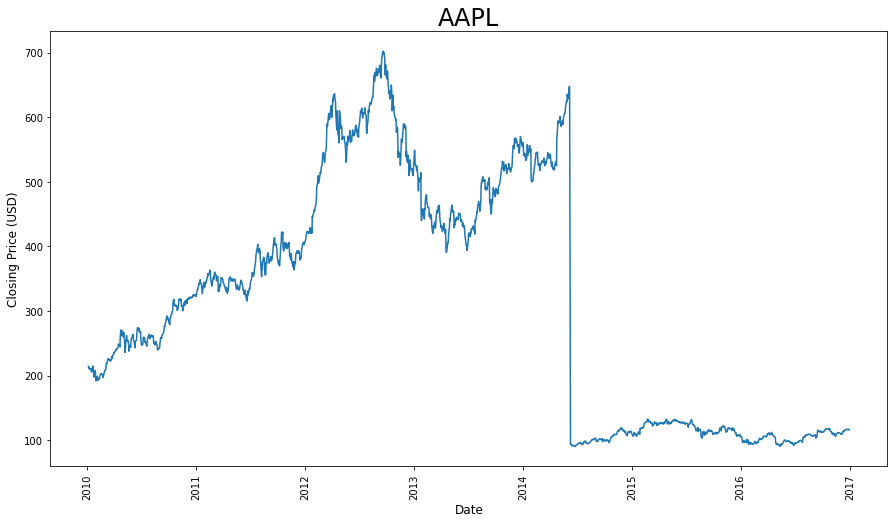

In [18]:
plt.figure(figsize=(15,8))#changes the size of the graph and has to go first
plt.xticks(rotation=90)#changes the angle
ax=sns.lineplot(data=AAPL, x='date', y='close')
ax.set_xlabel( "Date" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Closing Price (USD)" , size = 12 )
  
# Set title for plot
ax.set_title( "AAPL" , size = 24 )

As we can see, there is a huge drop in price on the chart betweemn 2014-15. The reason for this is because Apple(AAPL) had a 7-for-1 basis stock split on June 9, 2014. Since it is one of the most heavily traded stocks finding reliable correlations where volume remains relatively consistent will be unlikely. 

Text(0.5, 1.0, 'AAPL')

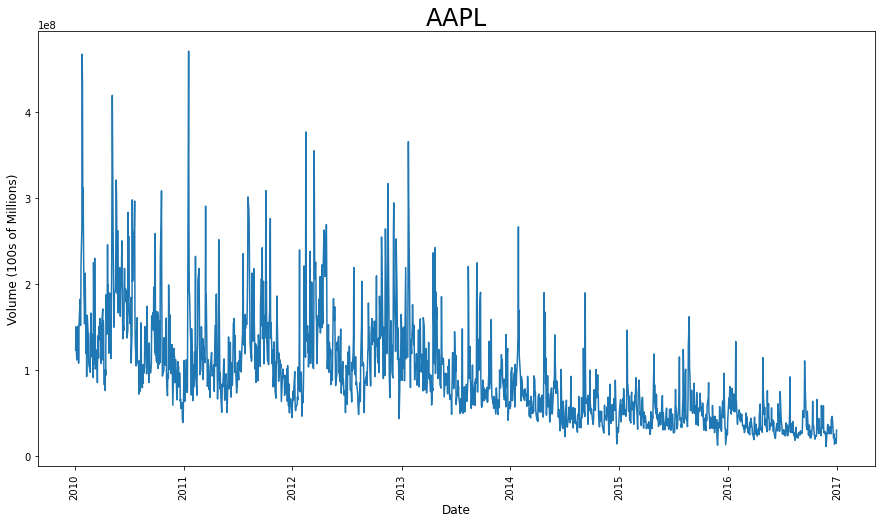

In [19]:
plt.figure(figsize=(15,8))#size has to go first
plt.xticks(rotation=90)#changes the angle
bx=sns.lineplot(data=AAPL, x='date', y='volume')
bx.set_xlabel( "Date" , size = 12 )
  
# Set label for y-axis
bx.set_ylabel( "Volume (100s of Millions)" , size = 12 )
  
# Set title for plot
bx.set_title( "AAPL" , size = 24 )

Let's zoom in a bit further and take a look the month before and the month after the month in which AAPL underwent its stock split.  

In [20]:
AAPL_SPLIT = df[(df['date'] >= '2014-05-01') & (df['date'] <= '2014-07-31') & (df['symbol']=='AAPL')]

In [21]:
# plt.figure(figsize=(15,8))#size has to go first
# plt.xticks(rotation=90)#changes the angle
# ax=sns.barplot(data=AAPL_SPLIT,x='date', y= 'volume')
# ax.set_xlabel( "Date" , size = 12 )
  
# # Set label for y-axis
# ax.set_ylabel( "Volume" , size = 12 )
  
# # Set title for plot
# ax.set_title( "AAPL(3 Months Before and After Split)" , size = 24 )



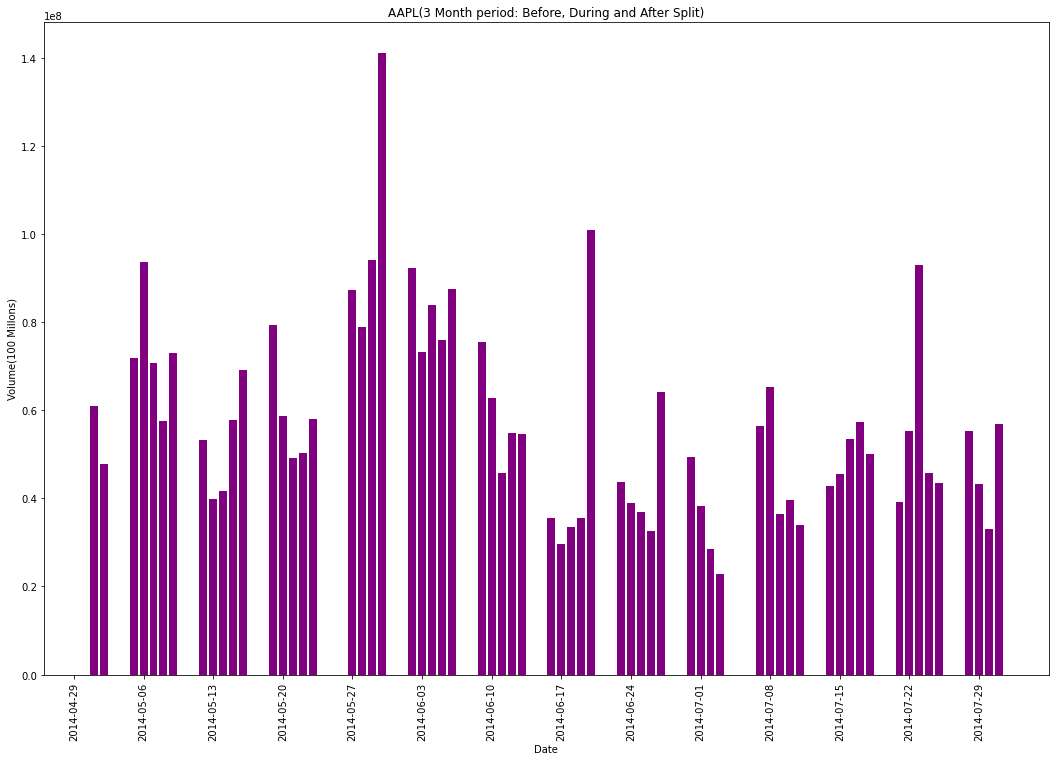

In [22]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# Create figure and plot space
fig, ax = plt.subplots(figsize=(18, 12))
plt.xticks(rotation=90)#changes the angle
# Add x-axis and y-axis
ax.bar(AAPL_SPLIT['date'],
       AAPL_SPLIT['volume'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Volume(100 Millons)",
       title="AAPL(3 Month period: Before, During and After Split)")

# Define the date format
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

As we can see, the period of time around the stock split, volume was very consistent.

In [23]:
AAPL #used to take a snapshot

,date,symbol,open,close,low,high,volume,diff open/close,diff high/low,Absolute diff high/low,Absolute diff open/close,intercept
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0,0.580000,2.119995,2.119995,0.580000,1.0
721,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0,-0.220005,2.340000,2.340000,0.220005,1.0
1189,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0,-3.409998,4.479996,4.479996,3.409998,1.0
1657,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0,-1.170000,2.950001,2.950001,1.170000,1.0
2125,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0,1.680011,2.940001,2.940001,1.680011,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0,0.930001,0.930001,0.930001,0.930001,1.0
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0,0.740005,1.310005,1.310005,0.740005,1.0
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0,-0.759995,1.820000,1.820000,0.759995,1.0
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0,0.280006,0.709999,0.709999,0.280006,1.0


We'll isolate the timeframe to just one year (2012) where the stock split doesn't affect the data for AAPL. 

In [24]:
#Selecting a specific time frame
AAPL_2012 = df[(df['date'] >= '2012-01-01') & (df['date'] <= '2012-12-31') & (df['symbol']=='AAPL')]
AAPL_2012

,date,symbol,open,close,low,high,volume,diff open/close,diff high/low,Absolute diff high/low,Absolute diff open/close,intercept
236832,2012-01-03,AAPL,409.399998,411.230000,408.999989,412.499989,75555200.0,1.830002,3.500000,3.500000,1.830002,1.0
237302,2012-01-04,AAPL,410.000011,413.440010,409.279995,414.680012,65005500.0,3.439999,5.400017,5.400017,3.439999,1.0
237772,2012-01-05,AAPL,414.950005,418.029995,412.670006,418.550007,67817400.0,3.079990,5.880001,5.880001,3.079990,1.0
238242,2012-01-06,AAPL,419.770008,422.400002,419.220009,422.749996,79573200.0,2.629994,3.529987,3.529987,2.629994,1.0
238712,2012-01-09,AAPL,425.499992,421.730000,421.349991,427.750004,98506100.0,-3.769992,6.400013,6.400013,3.769992,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
351982,2012-12-24,AAPL,520.350014,520.169983,518.709976,524.250023,43938300.0,-0.180031,5.540047,5.540047,0.180031,1.0
352452,2012-12-26,AAPL,519.000023,512.999992,511.120003,519.460007,75609100.0,-6.000031,8.340004,8.340004,6.000031,1.0
352922,2012-12-27,AAPL,513.539978,515.060013,504.659988,516.250000,113780100.0,1.520035,11.590012,11.590012,1.520035,1.0
353392,2012-12-28,AAPL,510.290024,509.589981,508.119987,514.480026,88569600.0,-0.700043,6.360039,6.360039,0.700043,1.0


In [25]:
AAPL_2012.drop(columns=['intercept'], inplace=True)#dropping intercept from earlier analysis because it's unnecessary to visualize

C:\Users\Andrew\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now that we are working with an isolated subset of the data, we'll give ourselves a visualization of how the variables correlate. 

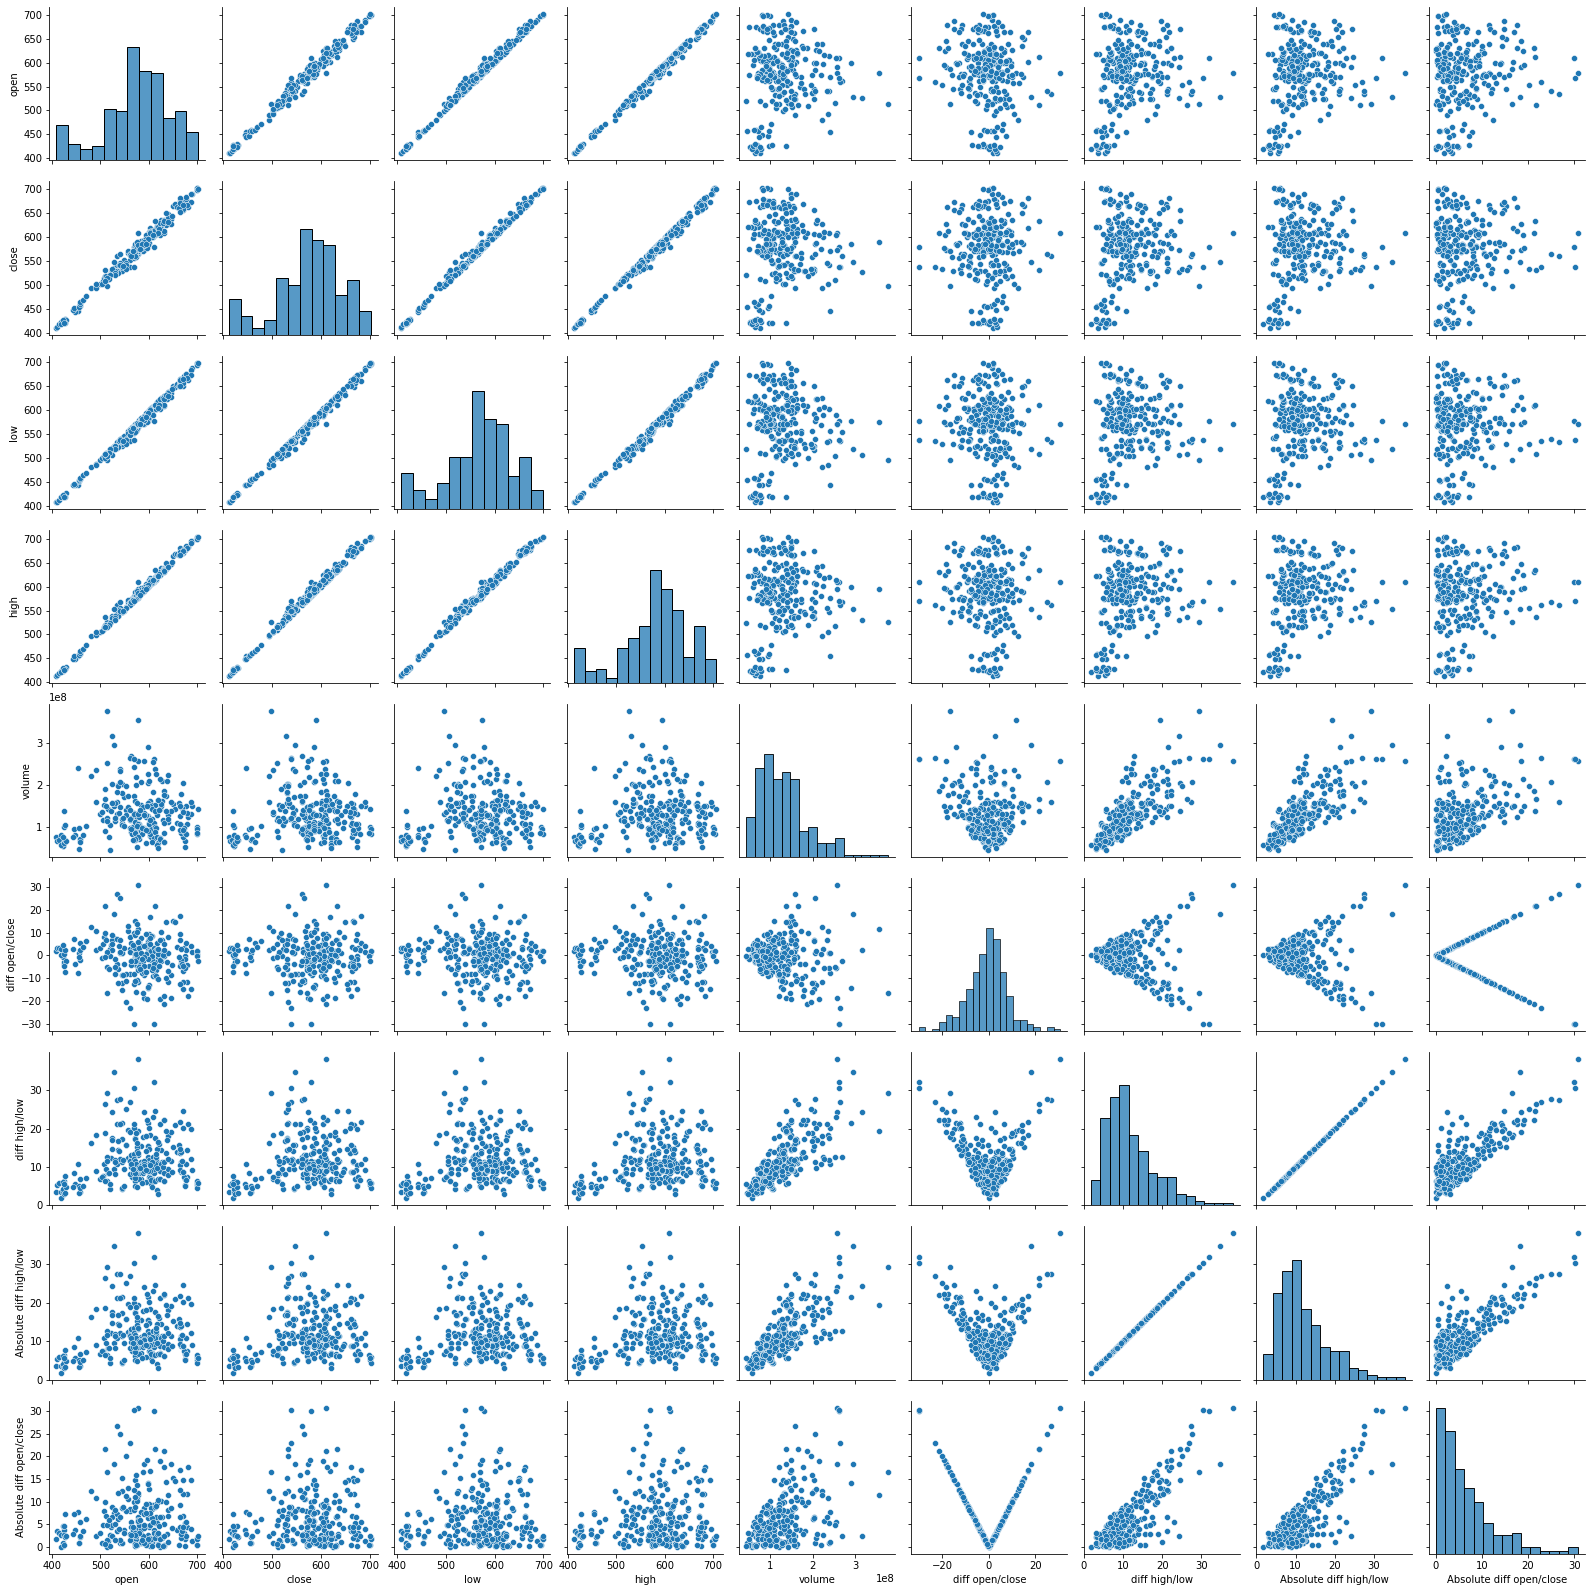

In [26]:
sns.pairplot(AAPL_2012)

In [27]:
AAPL_2012.corr()

,open,close,low,high,volume,diff open/close,diff high/low,Absolute diff high/low,Absolute diff open/close
open,1.000000,0.991392,0.996204,0.997085,0.064508,-0.127815,0.180524,0.180524,0.100279
close,0.991392,1.000000,0.996405,0.996172,0.045869,0.003141,0.168588,0.168588,0.084122
low,0.996204,0.996405,1.000000,0.995733,0.016341,-0.060851,0.125832,0.125832,0.055452
high,0.997085,0.996172,0.995733,1.000000,0.086234,-0.069341,0.216848,0.216848,0.130627
volume,0.064508,0.045869,0.016341,0.086234,1.000000,-0.145226,0.754137,0.754137,0.490223
diff open/close,-0.127815,0.003141,-0.060851,-0.069341,-0.145226,1.000000,-0.101721,-0.101721,-0.128669
diff high/low,0.180524,0.168588,0.125832,0.216848,0.754137,-0.101721,1.000000,1.000000,0.817633
Absolute diff high/low,0.180524,0.168588,0.125832,0.216848,0.754137,-0.101721,1.000000,1.000000,0.817633
Absolute diff open/close,0.100279,0.084122,0.055452,0.130627,0.490223,-0.128669,0.817633,0.817633,1.000000


Using the example of AAPL for 2012, we can see that the correlation between 'volume' and our 'diff high/low has improved substantially. So let's run our regression model on this subset. 

In [28]:
#Setting up our variables for our linear regression model
AAPL_2012['intercept'] = np.ones((AAPL_2012.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression
dependent_vars = AAPL_2012['volume']#volume will be our dependent variable
independent_vars = AAPL_2012[['open','close','high', 'low', 'diff open/close', 'diff high/low', 'Absolute diff open/close','Absolute diff high/low','intercept']]


C:\Users\Andrew\AppData\Local\Temp/ipykernel_48864/883156725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_2012['intercept'] = np.ones((AAPL_2012.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression


In [29]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     84.90
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.09e-51
Time:                        15:57:03   Log-Likelihood:                -4697.0
No. Observations:                 250   AIC:                             9406.
Df Residuals:                     244   BIC:                             9427.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
open                    

We'll try removing our 'open' and 'close' columns since they are high p-values, to see if we can improve our adjusted R-squared. Notice now that our numbers for Skew and Kurtosis are multiple times lower. 

In [30]:
#Setting up our variables for linear regression
dependent_vars = AAPL_2012['volume']#volume will be our dependent variable
independent_vars = AAPL_2012[['high', 'low', 'diff open/close', 'diff high/low', 'Absolute diff open/close','Absolute diff high/low','intercept']]
# df['intercept'] = np.ones((df.shape[0],))
independent_vars.head()

,high,low,diff open/close,diff high/low,Absolute diff open/close,Absolute diff high/low,intercept
236832,412.499989,408.999989,1.830002,3.500000,1.830002,3.500000,1.0
237302,414.680012,409.279995,3.439999,5.400017,3.439999,5.400017,1.0
237772,418.550007,412.670006,3.079990,5.880001,3.079990,5.880001,1.0
238242,422.749996,419.220009,2.629994,3.529987,2.629994,3.529987,1.0
238712,427.750004,421.349991,-3.769992,6.400013,3.769992,6.400013,1.0


In [31]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     106.5
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.92e-52
Time:                        15:57:03   Log-Likelihood:                -4697.0
No. Observations:                 250   AIC:                             9404.
Df Residuals:                     245   BIC:                             9422.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
high                    

Removing the 'open' and 'close' columns does not make our model much better. Nonetheless, we have achieved significantly better results analyzing our isolated example. 

# Conclusion

Based on the initial reults of our linear regression model which took the entire S&P 500 into account, we might be tempted to reject our original hypothesis that greater daily volume results in greater range of price action. However, we discovered that there were some very significant instances of stock-splits where a stock's price would drastically change overnight despite its volume remaining relatively stable. We then looked at an isolated example  of a high volume stock(AAPL) where it wasn't affected by a stock-split and achieved much better results with our linear regression model. 

On this basis, for further exploration we would want to run our model on a split-adjusted dataset for the S&P 500. We think it's worth investigating if relative volume might give us even better results that might be able to run equally well on split-adjusted or non-split-adjusted datasets. Until these areas of continued analysis are performed we will hold off on recommending how or when a trader might want to use volume to select stocks with the expectation of a greater range in daily price action. Still, we think that there is enough of a positive indication to support continued research into this area that could potentially lead to more definitive results. 